## Sampling Experiments

First goal is to aggregate the Wisconsin voting data into different levels of resolution, by creating blocks of different sizes composed of wards

In [1]:
#custom build tools
from graph_tools import graph_from_url
from connected_partitions import *
#general python tools
import csv
import os
from functools import partial
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from networkx import is_connected, connected_components
#gerry chain tools 
from gerrychain import (
    Election,
    Graph,
    MarkovChain,
    Partition,
    accept,
    constraints,
    updaters,
    GeographicPartition,
)
import maup as mp

Load Shapefiles into Geopandas dataframes, voting data is contained at the ward level and there is census data at the other levels

In [2]:
ward_data = gpd.read_file("./data/Wisconsin/WI_ltsb_corrected_final.shp")
bg_data = gpd.read_file("./data/WI/BG_55.shp")
block_data = gpd.read_file("./data/WI/BLOCK_55.shp")
county_data = gpd.read_file("./data/WI/COUNTY_55.shp")
cousub_data = gpd.read_file("./data/WI/COUSUB_55.shp")
tract_data = gpd.read_file("./data/WI/TRACT_55.shp")
ward_data.set_index("GEOID10", inplace=True)

In [3]:
levels_of_resolution = {"ward": ward_data, "bg": bg_data, "block": block_data, "county": county_data,"cousub": cousub_data, "tract": tract_data}

Variable descriptions for ward data:

| GEOID10 | OBJECTID  | NAME | CNTY_NAME | 
|---------|-----------|------|-----------|
|   Ward FIPS code  | Ward identifier|Ward name |County name |

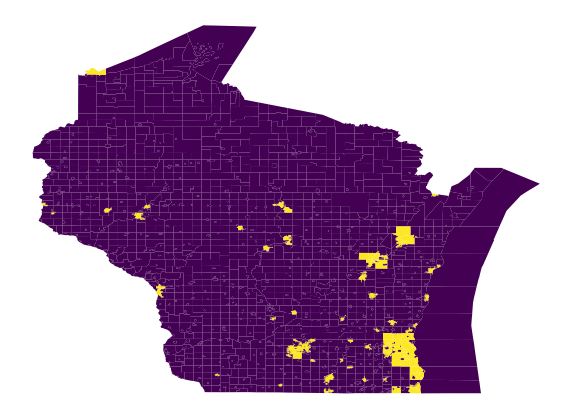

In [4]:
target_pop = 10000
cousub_data.plot(column = cousub_data['POP10'] >= target_pop, figsize=(10, 10))
plt.axis('off')
plt.show()

ward


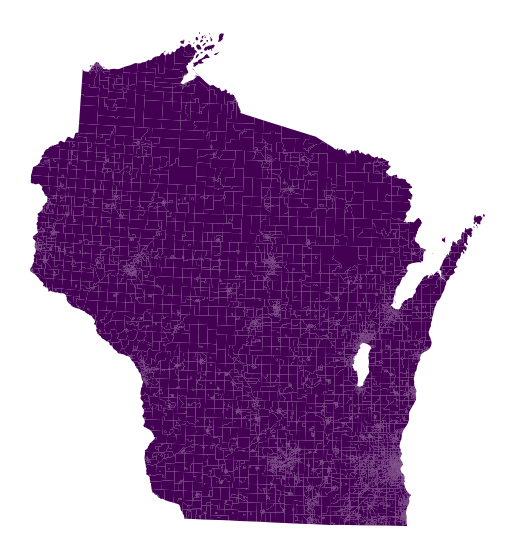

bg


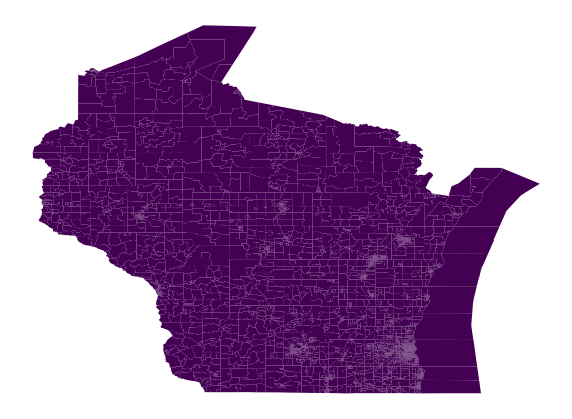

block


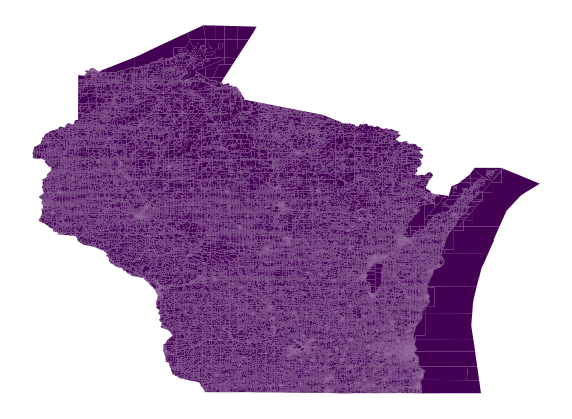

county


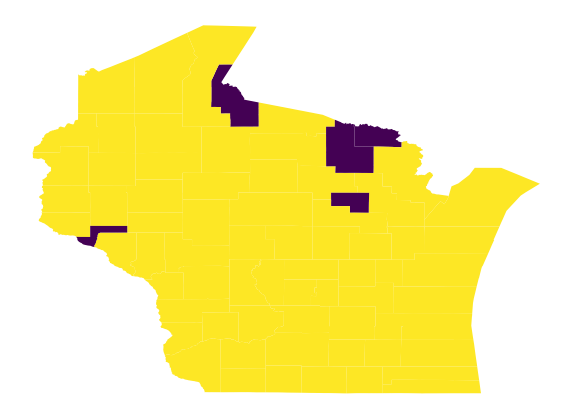

cousub


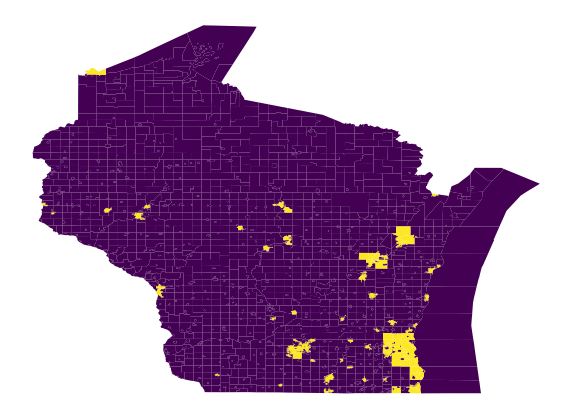

tract


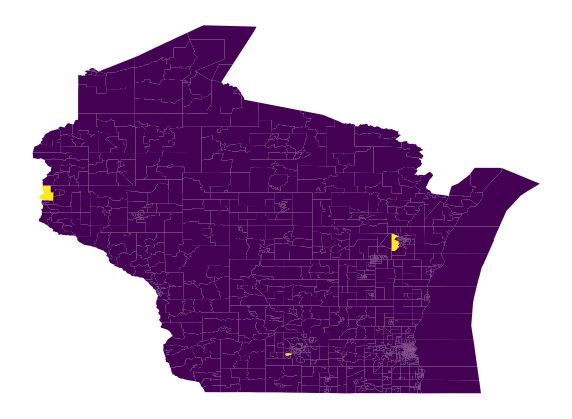

In [5]:
for level in levels_of_resolution:
    if level == 'ward':
        print(level)
        levels_of_resolution[level].plot(column = levels_of_resolution[level]['PERSONS'] >= target_pop,figsize=(10, 10))
        plt.axis('off')
        plt.show()
    else:
        print(level)
        levels_of_resolution[level].plot(column = levels_of_resolution[level]['POP10'] >= target_pop,figsize=(10, 10))
        plt.axis('off')
        plt.show()

Now going to use maup to move voting data to the different levels

In [6]:
type(county_data)

geopandas.geodataframe.GeoDataFrame

In [8]:
levels_of_resolution["ward"].to_crs(levels_of_resolution['county'].crs, inplace=True)
assignment = mp.assign(levels_of_resolution["ward"],levels_of_resolution['county'])

TopologyException: Input geom 0 is invalid: Self-intersection at or near point -90.261289951079576 43.731391876342933 at -90.261289951079576 43.731391876342933


TopologicalError: The operation 'GEOSIntersection_r' could not be performed. Likely cause is invalidity of the geometry <shapely.geometry.multipolygon.MultiPolygon object at 0x127450150>